In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from abc import ABC, abstractmethod
from scipy.integrate import solve_ivp
from scipy import fftpack
from sklearn.metrics import mean_squared_error
from fractions import Fraction

In [138]:
class EpidemiologyModel():
    def __init__(self, initial_conditions, parameters, t, steps=None):
        self.initial_conditions = initial_conditions
        self.parameters = parameters
        self.t = t
        
        if steps is None:
            self.t_eval = np.linspace(0, t, t)
        else:
            self.t_eval = np.linspace(0, t, steps)

    def solve(self, equations):
        sol = solve_ivp(
            fun=equations,
            t_span=[0, self.t],
            y0=self.initial_conditions,
            args=self.parameters,
            t_eval=self.t_eval,
            dense_output=True
        )        
        return sol.sol(self.t_eval)
    
    def plot(self, data, labels, axis_labels, title, size=(20, 6)):
        width, height = size
        fig, ax = plt.subplots(figsize=(width, height))

        t_span = np.arange(0, self.t)

        for label, values in zip(labels, data):
            ax.plot(t_span, values, label=label)

        x_label, y_label = axis_labels
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(title)
        ax.legend()
        ax.grid()

        plt.show()


In [139]:
def sir_equations(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def sirv_equations(t, y, beta, gamma, nu):
    S, I, R, V = y
    dSdt = -beta * S * I - nu * S
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    dVdt = nu * S
    return [dSdt, dIdt, dRdt, dVdt]

def seir_equations(t, y, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

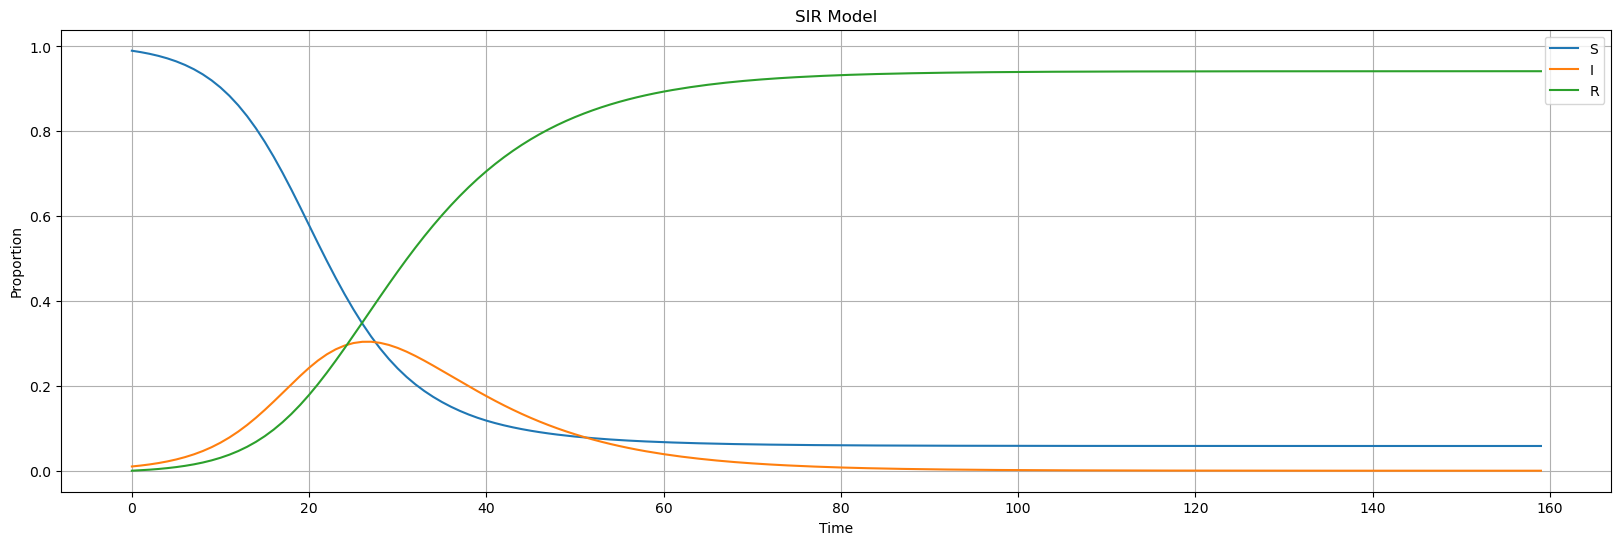

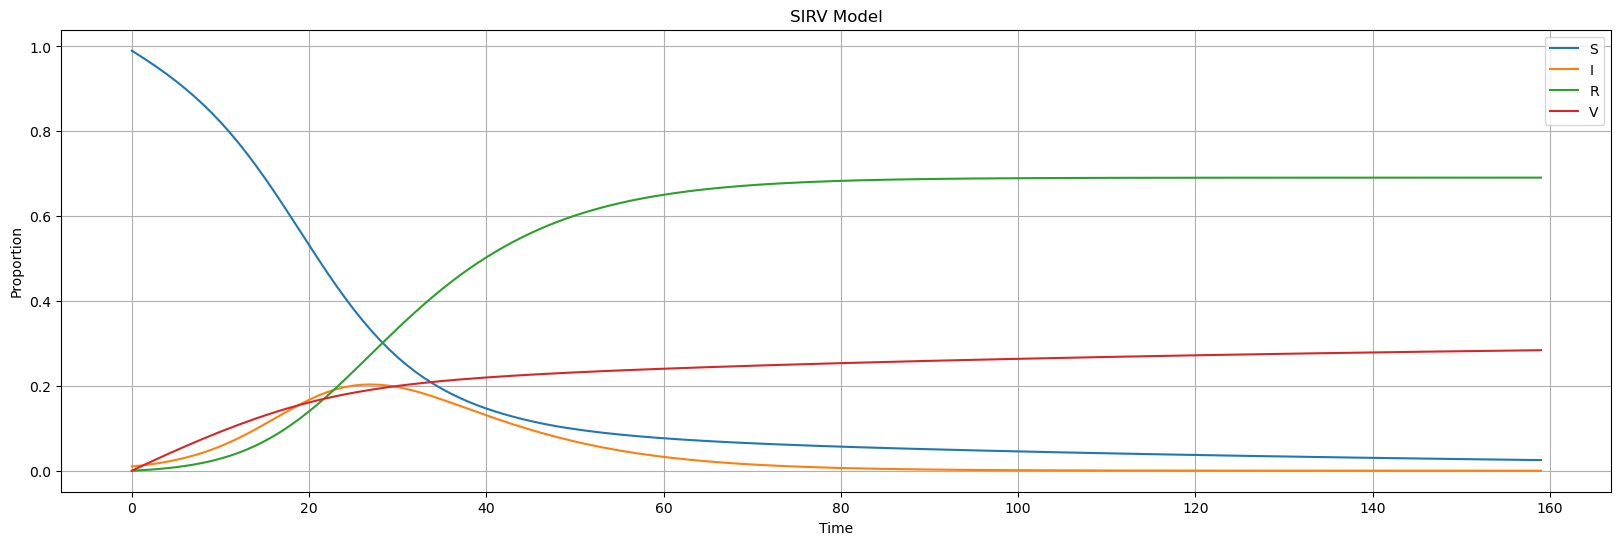

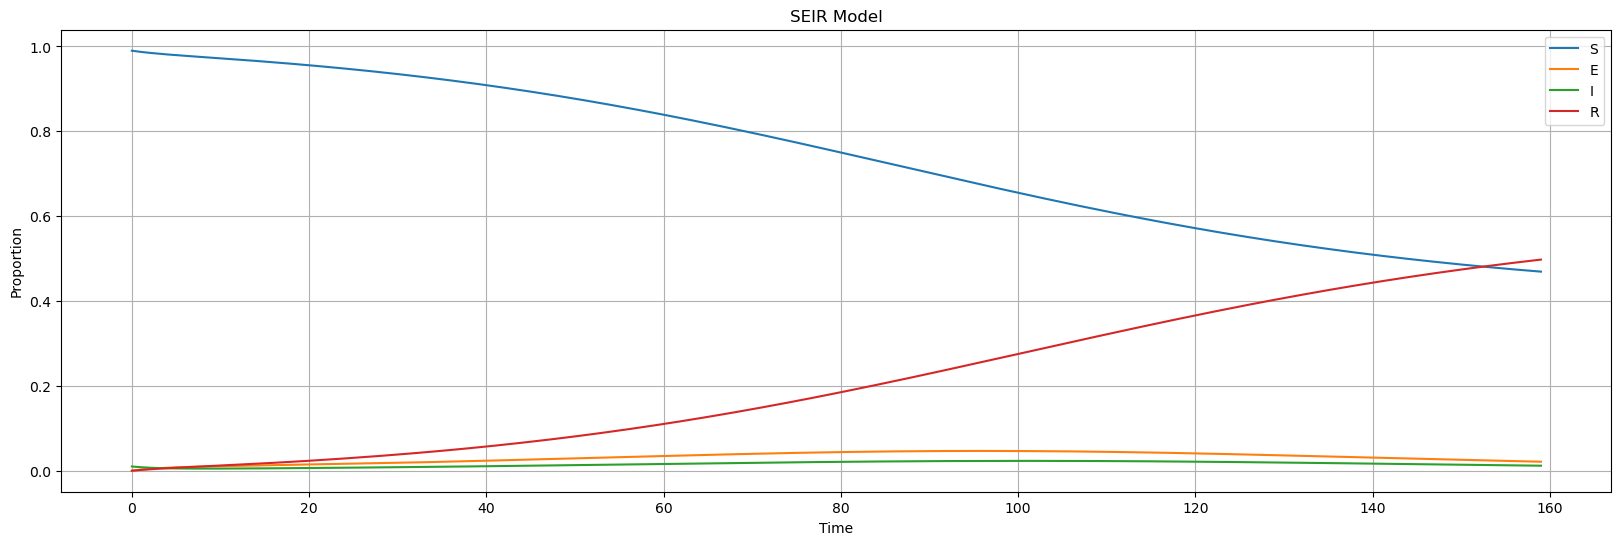

In [141]:
# Common parameters
t = 160
initial_conditions_sir = [0.99, 0.01, 0]  # S, I, R for SIR
initial_conditions_sirv = [0.99, 0.01, 0, 0]  # S, I, R, V for SIRV
initial_conditions_seir = [0.99, 0.0, 0.01, 0]  # S, E, I, R for SEIR

# Parameters for each model
params_sir = (0.3, 0.1)  # beta, gamma for SIR
params_sirv = (0.3, 0.1, 0.01)  # beta, gamma, nu for SIRV
params_seir = (0.3, 0.2, 0.1)  # beta, sigma, gamma for SEIR

# Solve SIR
sir_model = EpidemiologyModel(initial_conditions_sir, params_sir, t)
solution_sir = sir_model.solve(sir_equations)
sir_model.plot(solution_sir, ['S', 'I', 'R'], ('Time', 'Proportion'), 'SIR Model', (20, 6))

# Solve SIRV
sirv_model = EpidemiologyModel(initial_conditions_sirv, params_sirv, t)
solution_sirv = sirv_model.solve(sirv_equations)
sirv_model.plot(solution_sirv, ['S', 'I', 'R', 'V'], ('Time', 'Proportion'), 'SIRV Model', (20, 6))


seir_model = EpidemiologyModel(initial_conditions_seir, params_seir, t)
solution_seir = seir_model.solve(seir_equations)
seir_model.plot(solution_seir, ['S', 'E', 'I', 'R'], ('Time', 'Proportion'), 'SEIR Model', (20, 6))
